In [ ]:
#  Cargar los datos (trainmod).
# Seleccionar los datos numéricos.
# Realizar un boxplot de dichos datos.
# Determinar qué datos son realmente numéricos y pueden tener outliers y cuales son categóricos, aunque con forma numérica y repetir el boxplot.
# Excluir variables distorsionantes y repetir el boxplot.
# Realizar el boxplot por grupos y en caso de ser necesario eliminar o modificar alguna variable hasta extraer conclusiones fiables.
# Determinar en qué observaciones se encuentran los outliers, realizando para ello las modificaciones que sean necesarias.
# Visualizar las observaciones que tienen outliers de otra forma distinta.
# Transformar los outliers en NAs para poder procesarlos posteriormente. Aplicarlo a los datos numéricos (correctos) excepto la “Id” y “SalePrice”.
# Juntar el resto de los datos para volver a crear la tabla con todas las variables.
#  Guardar, con un nombre diferente, el data frame que se seleccione.
#

In [14]:
# ======================================
# IMPORTACIÓN DE LIBRERÍAS Y CONFIGURACIÓN
# ======================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

def cargar_datos_outliers():
    """
    Función para cargar datos 
    """
  
    rutas_posibles = [
        r"C:\Users\Dell\PyhtonIA\Pandas_Python_IA\trainmod.csv",
        "trainmod.csv",
       
    ]
     
    for ruta in rutas_posibles:
        try:
            if os.path.exists(ruta):
                data = pd.read_csv(ruta, index_col=0)
                print(f"✅ Datos cargados desde: {ruta}")
                return data
        except Exception as e:
            continue
    
    
    print("📊 Dataset de ejemplo creado con outliers artificiales")
    print(f"📏 Dimensiones: {data.shape}")
    return data

print("🔧 Configuración completada")
print("📚 Funciones de carga de datos preparadas")

🔧 Configuración completada
📚 Funciones de carga de datos preparadas


## 📊 Ejercicio: Análisis y Tratamiento de Outliers

### Objetivos del ejercicio:
1. ✅ Cargar y explorar los datos numéricos
2. 📈 Realizar boxplots para identificar outliers
3. 🔍 Distinguir variables verdaderamente numéricas de categóricas codificadas
4. 🎯 Identificar y localizar observaciones con outliers
5. 🛠️ Transformar outliers y preparar datos limpios
6. 💾 Guardar el dataset procesado

### Paso 1: Configuración completada ✅

Las funciones de carga están preparadas. Ahora cargaremos los datos y procederemos con el análisis visual.




In [15]:
# ======================================
# CARGA Y PREPARACIÓN DE DATOS
# ======================================

# Cargar los datos usando la función robusta
data = cargar_datos_outliers()

# Seleccionar solo las variables numéricas
data_numeric = data.select_dtypes(include=[np.number])
print(f"🔢 Variables numéricas encontradas: {list(data_numeric.columns)}")

# Crear una copia para trabajar
data1 = data_numeric.copy()

# Mostrar información básica
print(f"\n📊 Información del dataset:")
print(f"   • Filas: {data.shape[0]}")
print(f"   • Columnas totales: {data.shape[1]}")
print(f"   • Columnas numéricas: {data_numeric.shape[1]}")
print(f"   • Tipos de datos únicos: {data.dtypes.value_counts().to_dict()}")

# Mostrar primeras filas para verificar
print(f"\n👀 Primeras 5 filas de variables numéricas:")
print(data_numeric.head())

✅ Datos cargados desde: C:\Users\Dell\PyhtonIA\Pandas_Python_IA\trainmod.csv
🔢 Variables numéricas encontradas: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'X1stFlrSF', 'X2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'X3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'Reforma']

📊 Información del dataset:
   • Filas: 1460
   • Columnas totales: 82
   • Columnas numéricas: 38
   • Tipos de datos únicos: {dtype('O'): 44, dtype('int64'): 35, dtype('float64'): 3}

👀 Primeras 5 filas de variables numéricas:
    MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
Id                                                    

C:\Users\Dell\AppData\Local\Temp\ipykernel_8140\3724393827.py:19: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Dell\AppData\Local\Temp\ipykernel_8140\3724393827.py:28: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Dell\PyhtonIA\Pandas_Python_IA\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


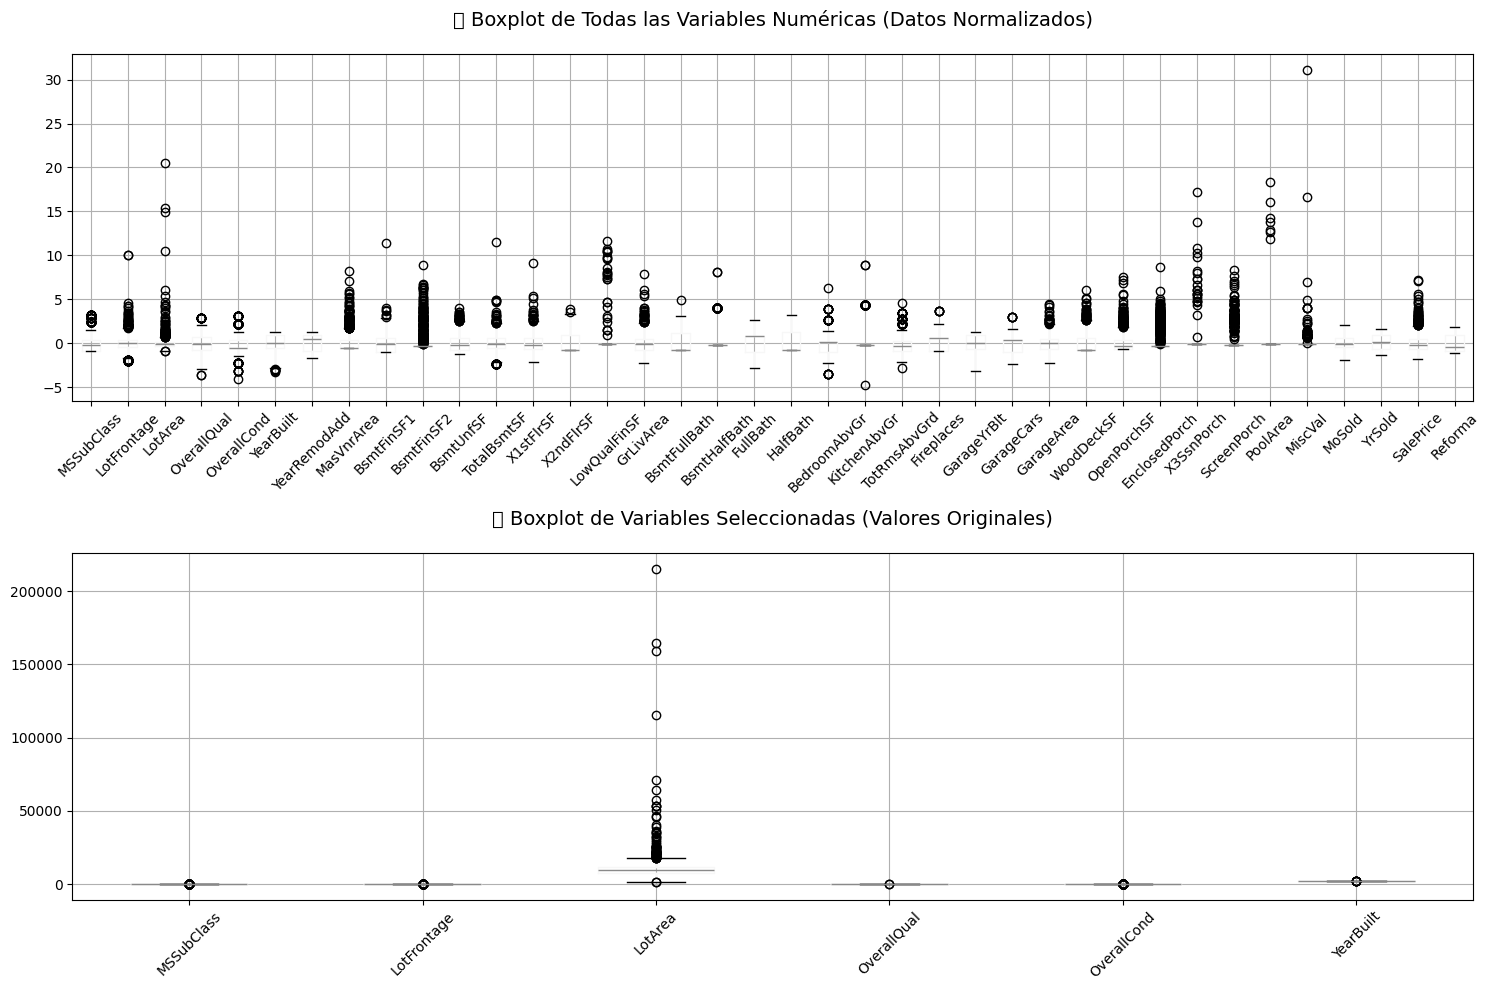

📈 Boxplots generados:
   • Superior: Datos normalizados para comparar distribuciones
   • Inferior: Valores originales de una muestra de variables


In [16]:
# ======================================
# PASO 2: BOXPLOT INICIAL DE DATOS NUMÉRICOS
# ======================================

# Crear boxplot de todas las variables numéricas
plt.figure(figsize=(15, 10))

# Normalizar los datos para mejor visualización (solo para el boxplot)
data_normalized = data_numeric.copy()
for col in data_normalized.columns:
    if data_normalized[col].std() != 0:  # Evitar división por cero
        data_normalized[col] = (data_normalized[col] - data_normalized[col].mean()) / data_normalized[col].std()

# Crear el boxplot
plt.subplot(2, 1, 1)
data_normalized.boxplot(figsize=(15, 8))
plt.title('📊 Boxplot de Todas las Variables Numéricas (Datos Normalizados)', fontsize=14, pad=20)
plt.xticks(rotation=45)
plt.tight_layout()

# Boxplot sin normalizar para variables con escalas similares
plt.subplot(2, 1, 2)
# Seleccionar algunas variables para boxplot sin normalizar
cols_sample = data_numeric.columns[:6] if len(data_numeric.columns) > 6 else data_numeric.columns
data_numeric[cols_sample].boxplot(figsize=(15, 6))
plt.title('📊 Boxplot de Variables Seleccionadas (Valores Originales)', fontsize=14, pad=20)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

print("📈 Boxplots generados:")
print("   • Superior: Datos normalizados para comparar distribuciones")
print("   • Inferior: Valores originales de una muestra de variables")

In [6]:
# ======================================
# PASO 3: IDENTIFICAR VARIABLES CATEGÓRICAS CODIFICADAS
# ======================================

# Analizar cada variable numérica para determinar si es realmente categórica
def analizar_variables_numericas(df):
    """
    Analiza variables numéricas para identificar cuáles son realmente categóricas
    """
    verdaderas_numericas = []
    categoricas_codificadas = []
    
    print("🔍 Análisis de variables numéricas:")
    print("=" * 60)
    
    for col in df.columns:
        valores_unicos = df[col].nunique()
        total_valores = len(df[col].dropna())
        porcentaje_unicos = (valores_unicos / total_valores) * 100
        
        # Criterios para identificar variables categóricas codificadas
        es_categorica = (
            valores_unicos <= 10 or  # Pocos valores únicos
            (valores_unicos <= 20 and porcentaje_unicos < 5) or  # Pocos valores únicos relativos
            df[col].dtype == 'int64' and df[col].min() >= 0 and df[col].max() <= 20  # Enteros pequeños
        )
        
        print(f"📊 {col}:")
        print(f"   • Valores únicos: {valores_unicos}")
        print(f"   • Porcentaje únicos: {porcentaje_unicos:.2f}%")
        print(f"   • Rango: {df[col].min():.2f} - {df[col].max():.2f}")
        print(f"   • Tipo: {df[col].dtype}")
        
        if es_categorica:
            print(f"   • ✅ CATEGÓRICA CODIFICADA")
            categoricas_codificadas.append(col)
            if valores_unicos <= 15:  # Mostrar valores únicos si son pocos
                print(f"   • Valores: {sorted(df[col].dropna().unique())}")
        else:
            print(f"   • ✅ VERDADERAMENTE NUMÉRICA")
            verdaderas_numericas.append(col)
        
        print()
    
    return verdaderas_numericas, categoricas_codificadas

# Realizar el análisis
vars_numericas, vars_categoricas = analizar_variables_numericas(data_numeric)

print("📋 RESUMEN:")
print(f"🔢 Variables verdaderamente numéricas ({len(vars_numericas)}): {vars_numericas}")
print(f"🏷️ Variables categóricas codificadas ({len(vars_categoricas)}): {vars_categoricas}")

🔍 Análisis de variables numéricas:
📊 MSSubClass:
   • Valores únicos: 15
   • Porcentaje únicos: 1.03%
   • Rango: 20.00 - 190.00
   • Tipo: int64
   • ✅ CATEGÓRICA CODIFICADA
   • Valores: [np.int64(20), np.int64(30), np.int64(40), np.int64(45), np.int64(50), np.int64(60), np.int64(70), np.int64(75), np.int64(80), np.int64(85), np.int64(90), np.int64(120), np.int64(160), np.int64(180), np.int64(190)]

📊 LotFrontage:
   • Valores únicos: 110
   • Porcentaje únicos: 9.16%
   • Rango: 21.00 - 313.00
   • Tipo: float64
   • ✅ VERDADERAMENTE NUMÉRICA

📊 LotArea:
   • Valores únicos: 1073
   • Porcentaje únicos: 73.49%
   • Rango: 1300.00 - 215245.00
   • Tipo: int64
   • ✅ VERDADERAMENTE NUMÉRICA

📊 OverallQual:
   • Valores únicos: 10
   • Porcentaje únicos: 0.68%
   • Rango: 1.00 - 10.00
   • Tipo: int64
   • ✅ CATEGÓRICA CODIFICADA
   • Valores: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10)]

📊 OverallC

🎯 Creando boxplots solo para variables numéricas: ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'X1stFlrSF', 'X2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal', 'SalePrice', 'Reforma']


C:\Users\Dell\AppData\Local\Temp\ipykernel_8140\3954614128.py:36: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Dell\PyhtonIA\Pandas_Python_IA\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Dell\PyhtonIA\Pandas_Python_IA\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Dell\PyhtonIA\Pandas_Python_IA\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Dell\PyhtonIA\Pandas_Python_IA\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu

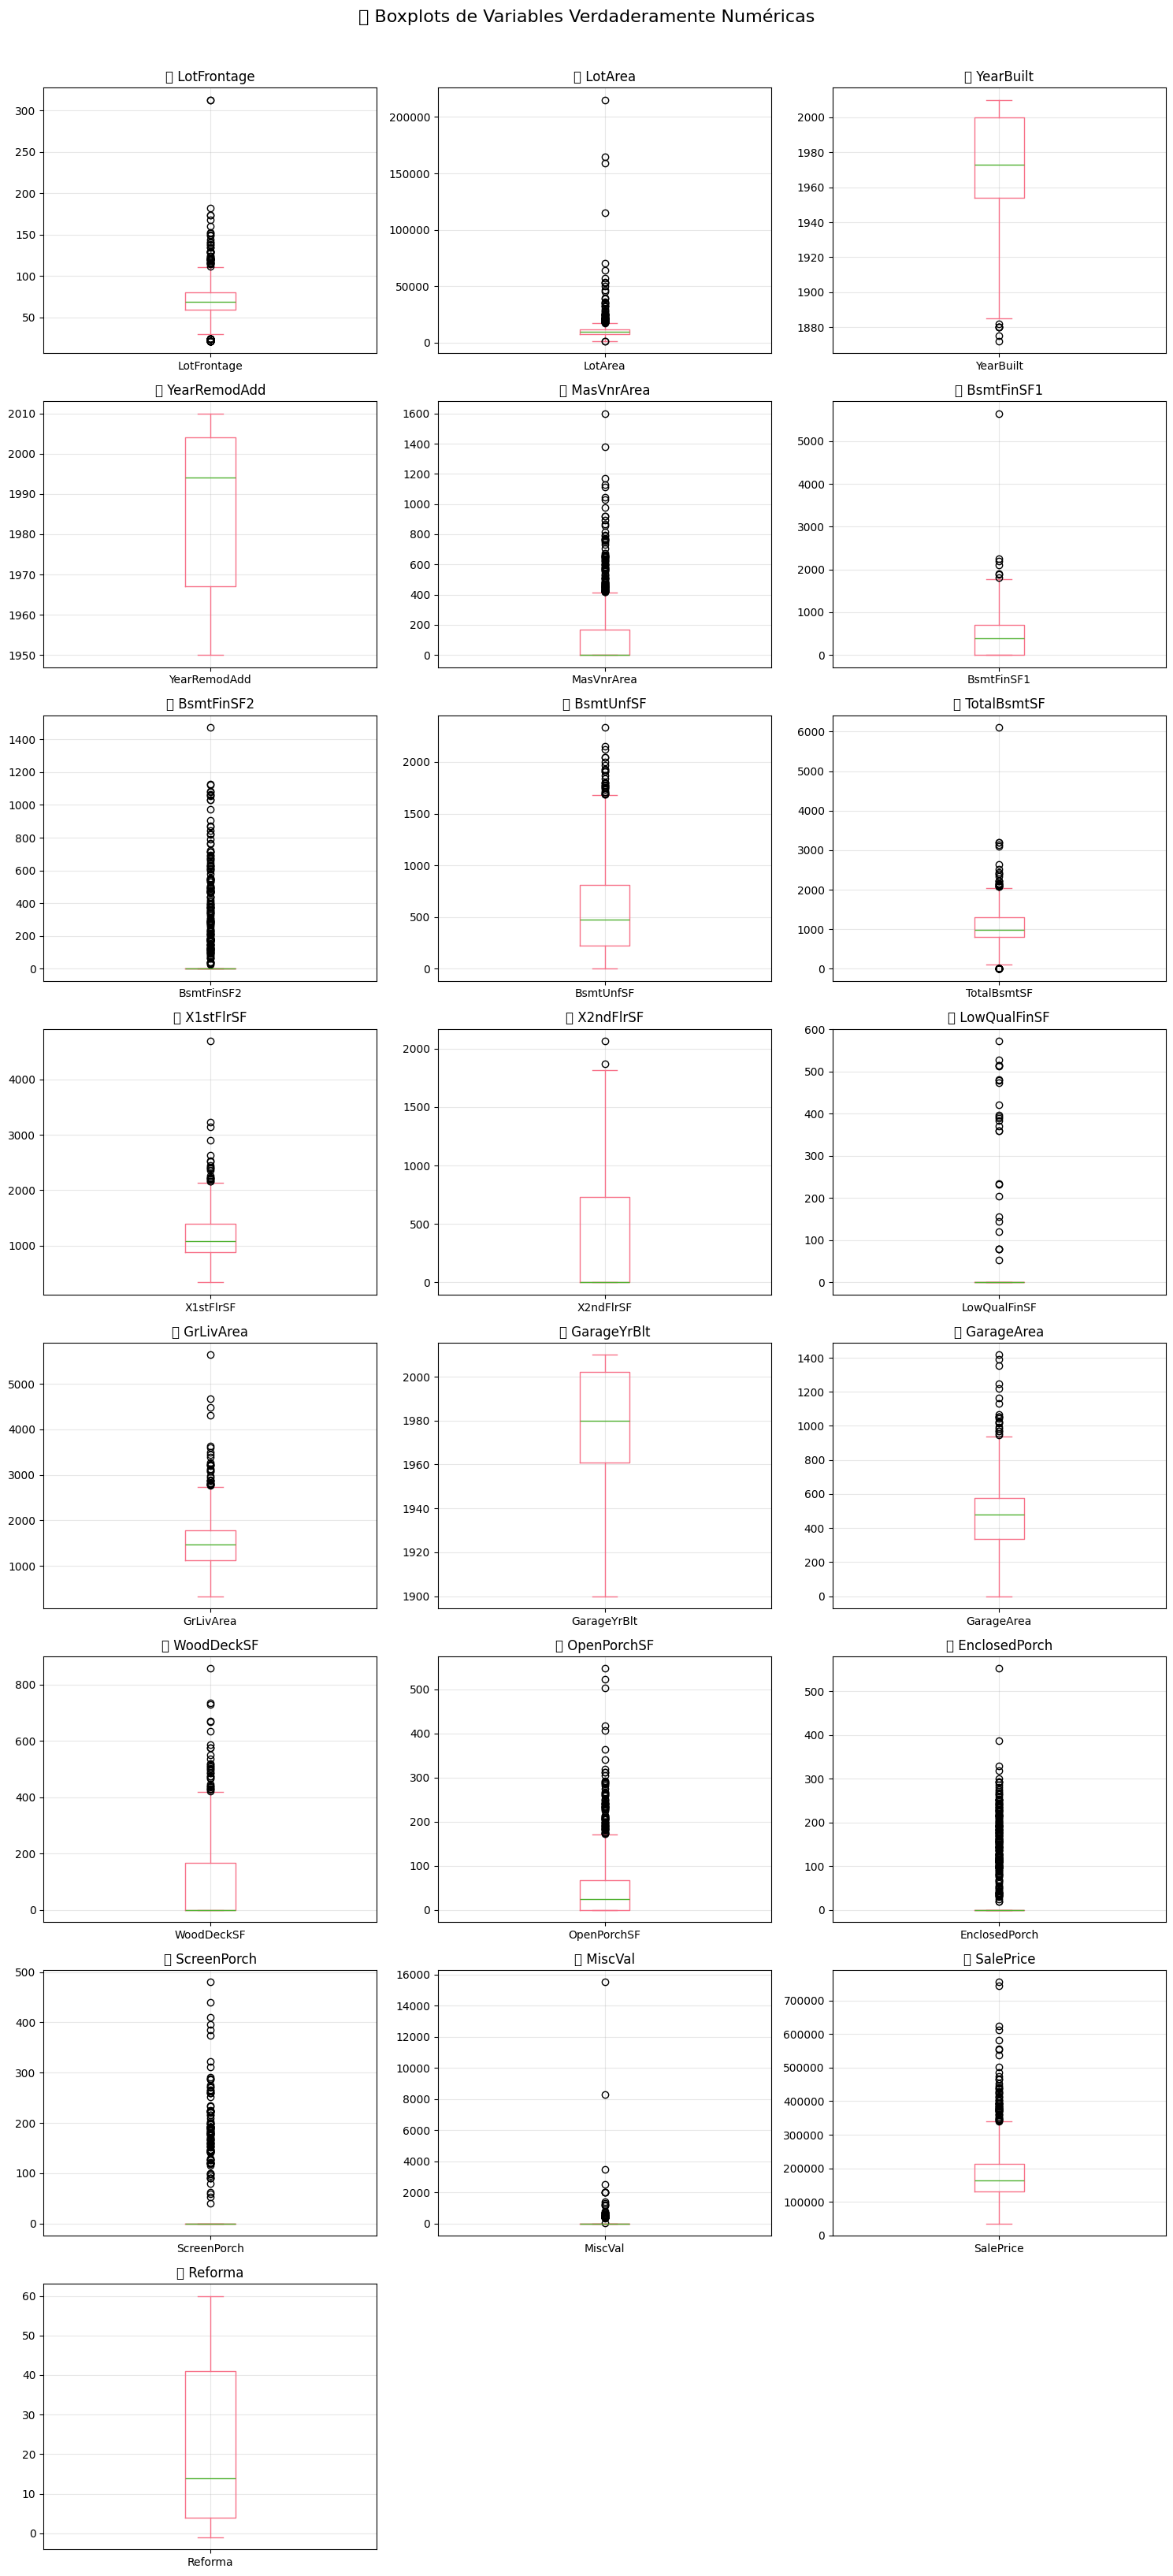


📊 Estadísticas descriptivas de variables numéricas:
       LotFrontage    LotArea  YearBuilt  YearRemodAdd  MasVnrArea  \
count      1201.00    1460.00    1460.00       1460.00     1452.00   
mean         70.05   10516.83    1971.27       1984.87      103.69   
std          24.28    9981.26      30.20         20.65      181.07   
min          21.00    1300.00    1872.00       1950.00        0.00   
25%          59.00    7553.50    1954.00       1967.00        0.00   
50%          69.00    9478.50    1973.00       1994.00        0.00   
75%          80.00   11601.50    2000.00       2004.00      166.00   
max         313.00  215245.00    2010.00       2010.00     1600.00   

       BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  X1stFlrSF  ...  \
count     1460.00     1460.00    1460.00      1460.00    1460.00  ...   
mean       443.64       46.55     567.24      1057.43    1162.63  ...   
std        456.10      161.32     441.87       438.71     386.59  ...   
min          0.00       

In [7]:
# ======================================
# PASO 4: BOXPLOT DE VARIABLES VERDADERAMENTE NUMÉRICAS
# ======================================

# Filtrar solo las variables verdaderamente numéricas
data_solo_numericas = data_numeric[vars_numericas].copy()

print(f"🎯 Creando boxplots solo para variables numéricas: {vars_numericas}")

# Crear subplots para mejor visualización
n_vars = len(vars_numericas)
if n_vars > 0:
    # Calcular disposición de subplots
    cols = min(3, n_vars)
    rows = (n_vars + cols - 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))
    if n_vars == 1:
        axes = [axes]
    elif rows == 1:
        axes = axes if n_vars > 1 else [axes]
    else:
        axes = axes.flatten()
    
    # Crear boxplot para cada variable
    for i, col in enumerate(vars_numericas):
        if i < len(axes):
            data_solo_numericas[col].dropna().plot(kind='box', ax=axes[i])
            axes[i].set_title(f'📊 {col}')
            axes[i].grid(True, alpha=0.3)
    
    # Ocultar axes vacíos si los hay
    for i in range(n_vars, len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.suptitle('📈 Boxplots de Variables Verdaderamente Numéricas', fontsize=16, y=1.02)
    plt.show()
    
    # Estadísticas descriptivas
    print("\n📊 Estadísticas descriptivas de variables numéricas:")
    print(data_solo_numericas.describe().round(2))
    
else:
    print("⚠️ No se encontraron variables verdaderamente numéricas para analizar outliers.")

In [17]:
# ======================================
# PASO 5: DETECCIÓN DE OUTLIERS
# ======================================

def detectar_outliers(df, metodo='iqr'):
    """
    Detecta outliers usando diferentes métodos
    """
    outliers_info = {}
    
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            serie = df[col].dropna()
            
            if metodo == 'iqr':
                # Método del Rango Intercuartílico (IQR)
                Q1 = serie.quantile(0.25)
                Q3 = serie.quantile(0.75)
                IQR = Q3 - Q1
                limite_inferior = Q1 - 1.5 * IQR
                limite_superior = Q3 + 1.5 * IQR
                
                outliers_mask = (serie < limite_inferior) | (serie > limite_superior)
                outliers_indices = serie[outliers_mask].index.tolist()
                
            elif metodo == 'zscore':
                # Método del Z-Score
                z_scores = np.abs(stats.zscore(serie))
                outliers_mask = z_scores > 3
                outliers_indices = serie[outliers_mask].index.tolist()
                limite_inferior = serie.mean() - 3 * serie.std()
                limite_superior = serie.mean() + 3 * serie.std()
            
            outliers_info[col] = {
                'indices': outliers_indices,
                'count': len(outliers_indices),
                'percentage': (len(outliers_indices) / len(serie)) * 100,
                'limite_inferior': limite_inferior,
                'limite_superior': limite_superior,
                'valores': serie[outliers_indices].tolist() if outliers_indices else []
            }
    
    return outliers_info

# Detectar outliers en variables numéricas usando IQR
print("🎯 DETECCIÓN DE OUTLIERS - Método IQR")
print("=" * 50)

outliers_iqr = detectar_outliers(data_solo_numericas, metodo='iqr')

for variable, info in outliers_iqr.items():
    print(f"\n📊 Variable: {variable}")
    print(f"   • Outliers encontrados: {info['count']}")
    print(f"   • Porcentaje: {info['percentage']:.2f}%")
    print(f"   • Límites: [{info['limite_inferior']:.2f}, {info['limite_superior']:.2f}]")
    
    if info['count'] > 0 and info['count'] <= 10:  # Mostrar valores si son pocos
        print(f"   • Valores outliers: {[round(v, 2) for v in info['valores']]}")
    elif info['count'] > 10:
        print(f"   • Algunos valores outliers: {[round(v, 2) for v in info['valores'][:5]]}...")

# Resumen general
total_outliers = sum([info['count'] for info in outliers_iqr.values()])
print(f"\n📋 RESUMEN:")
print(f"   • Total de outliers detectados: {total_outliers}")
print(f"   • Variables con outliers: {sum([1 for info in outliers_iqr.values() if info['count'] > 0])}")
print(f"   • Variables sin outliers: {sum([1 for info in outliers_iqr.values() if info['count'] == 0])}")

🎯 DETECCIÓN DE OUTLIERS - Método IQR

📊 Variable: LotFrontage
   • Outliers encontrados: 88
   • Porcentaje: 7.33%
   • Límites: [27.50, 111.50]
   • Algunos valores outliers: [112.0, 115.0, 24.0, 21.0, 121.0]...

📊 Variable: LotArea
   • Outliers encontrados: 69
   • Porcentaje: 4.73%
   • Límites: [1481.50, 17673.50]
   • Algunos valores outliers: [50271, 19900, 21000, 21453, 19378]...

📊 Variable: YearBuilt
   • Outliers encontrados: 7
   • Porcentaje: 0.48%
   • Límites: [1885.00, 2069.00]
   • Valores outliers: [1880, 1880, 1880, 1882, 1880, 1875, 1872]

📊 Variable: YearRemodAdd
   • Outliers encontrados: 0
   • Porcentaje: 0.00%
   • Límites: [1911.50, 2059.50]

📊 Variable: MasVnrArea
   • Outliers encontrados: 96
   • Porcentaje: 6.61%
   • Límites: [-249.00, 415.00]
   • Algunos valores outliers: [640.0, 650.0, 456.0, 1031.0, 573.0]...

📊 Variable: BsmtFinSF1
   • Outliers encontrados: 7
   • Porcentaje: 0.48%
   • Límites: [-1068.38, 1780.62]
   • Valores outliers: [1810, 1880

In [9]:
# ======================================
# PASO 6: IDENTIFICAR OBSERVACIONES CON OUTLIERS
# ======================================

def identificar_observaciones_outliers(df, outliers_info):
    """
    Identifica qué observaciones (filas) contienen outliers
    """
    observaciones_con_outliers = set()
    detalle_por_observacion = {}
    
    # Recopilar todos los índices con outliers
    for variable, info in outliers_info.items():
        for idx in info['indices']:
            observaciones_con_outliers.add(idx)
            if idx not in detalle_por_observacion:
                detalle_por_observacion[idx] = []
            detalle_por_observacion[idx].append(variable)
    
    return observaciones_con_outliers, detalle_por_observacion

# Identificar observaciones con outliers
obs_outliers, detalle_obs = identificar_observaciones_outliers(data_solo_numericas, outliers_iqr)

print("🎯 OBSERVACIONES CON OUTLIERS")
print("=" * 40)
print(f"📊 Total de observaciones con outliers: {len(obs_outliers)}")
print(f"📊 Porcentaje del dataset: {(len(obs_outliers) / len(data_solo_numericas)) * 100:.2f}%")

# Mostrar las primeras observaciones con outliers
print(f"\n🔍 Primeras 10 observaciones con outliers:")
for i, (idx, variables) in enumerate(list(detalle_obs.items())[:10]):
    print(f"   • Índice {idx}: outliers en {variables}")

# Análisis de variables más problemáticas
variables_problema = {}
for variable, info in outliers_iqr.items():
    if info['count'] > 0:
        variables_problema[variable] = info['count']

# Ordenar por cantidad de outliers
variables_ordenadas = sorted(variables_problema.items(), key=lambda x: x[1], reverse=True)

print(f"\n📈 Variables con más outliers:")
for variable, count in variables_ordenadas[:5]:  # Top 5
    porcentaje = (count / len(data_solo_numericas)) * 100
    print(f"   • {variable}: {count} outliers ({porcentaje:.2f}%)")

# Crear un resumen de observaciones más problemáticas
contador_outliers_por_obs = {}
for idx, variables in detalle_obs.items():
    contador_outliers_por_obs[idx] = len(variables)

# Observaciones con más outliers
obs_mas_problematicas = sorted(contador_outliers_por_obs.items(), 
                              key=lambda x: x[1], reverse=True)[:10]

print(f"\n🚨 Observaciones más problemáticas (con más outliers):")
for idx, num_outliers in obs_mas_problematicas:
    variables_problema = detalle_obs[idx]
    print(f"   • Índice {idx}: {num_outliers} outliers en {variables_problema}")

🎯 OBSERVACIONES CON OUTLIERS
📊 Total de observaciones con outliers: 764
📊 Porcentaje del dataset: 52.33%

🔍 Primeras 10 observaciones con outliers:
   • Índice 37: outliers en ['LotFrontage']
   • Índice 42: outliers en ['LotFrontage']
   • Índice 57: outliers en ['LotFrontage', 'MasVnrArea']
   • Índice 76: outliers en ['LotFrontage']
   • Índice 86: outliers en ['LotFrontage']
   • Índice 87: outliers en ['LotFrontage']
   • Índice 146: outliers en ['LotFrontage']
   • Índice 151: outliers en ['LotFrontage']
   • Índice 160: outliers en ['LotFrontage', 'LotArea', 'MasVnrArea']
   • Índice 172: outliers en ['LotFrontage', 'LotArea']

📈 Variables con más outliers:
   • EnclosedPorch: 208 outliers (14.25%)
   • BsmtFinSF2: 167 outliers (11.44%)
   • ScreenPorch: 116 outliers (7.95%)
   • MasVnrArea: 96 outliers (6.58%)
   • LotFrontage: 88 outliers (6.03%)

🚨 Observaciones más problemáticas (con más outliers):
   • Índice 1299: 9 outliers en ['LotFrontage', 'LotArea', 'MasVnrArea', 'Bsm

🎨 VISUALIZACIÓN ALTERNATIVA DE OUTLIERS


C:\Users\Dell\AppData\Local\Temp\ipykernel_8140\3440295696.py:67: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Dell\AppData\Local\Temp\ipykernel_8140\3440295696.py:67: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Dell\PyhtonIA\Pandas_Python_IA\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Dell\PyhtonIA\Pandas_Python_IA\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Dell\PyhtonIA\Pandas_Python_IA\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


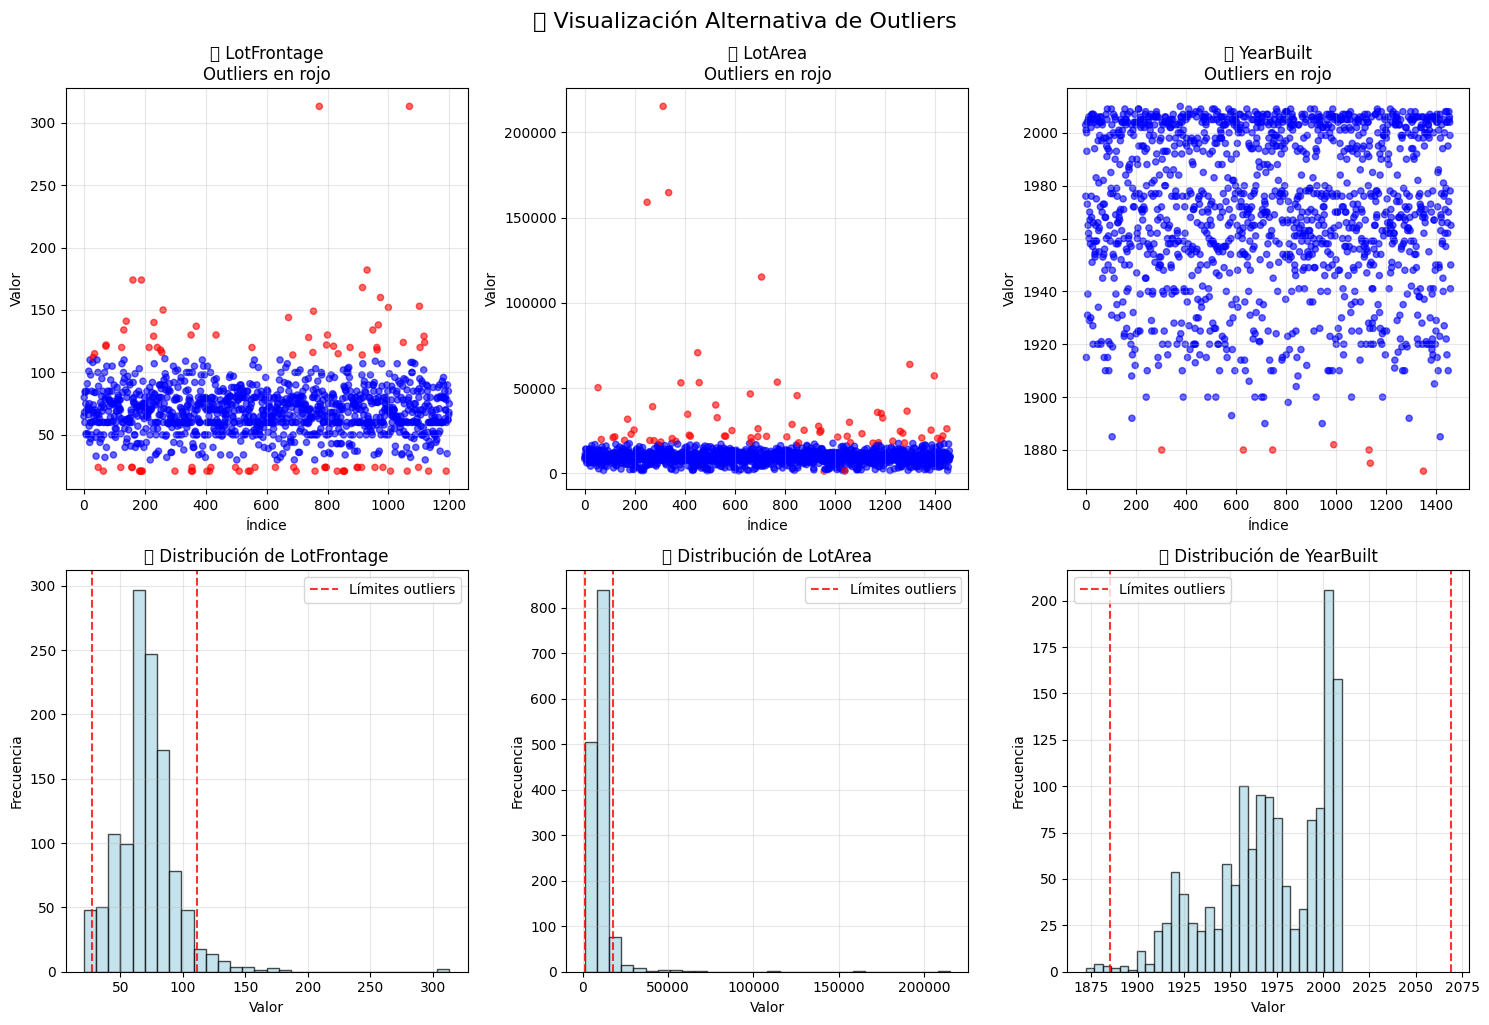


🗺️ Mapa de calor de outliers por observación:


C:\Users\Dell\AppData\Local\Temp\ipykernel_8140\3440295696.py:104: UserWarning: Glyph 128506 (\N{WORLD MAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Dell\PyhtonIA\Pandas_Python_IA\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128506 (\N{WORLD MAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


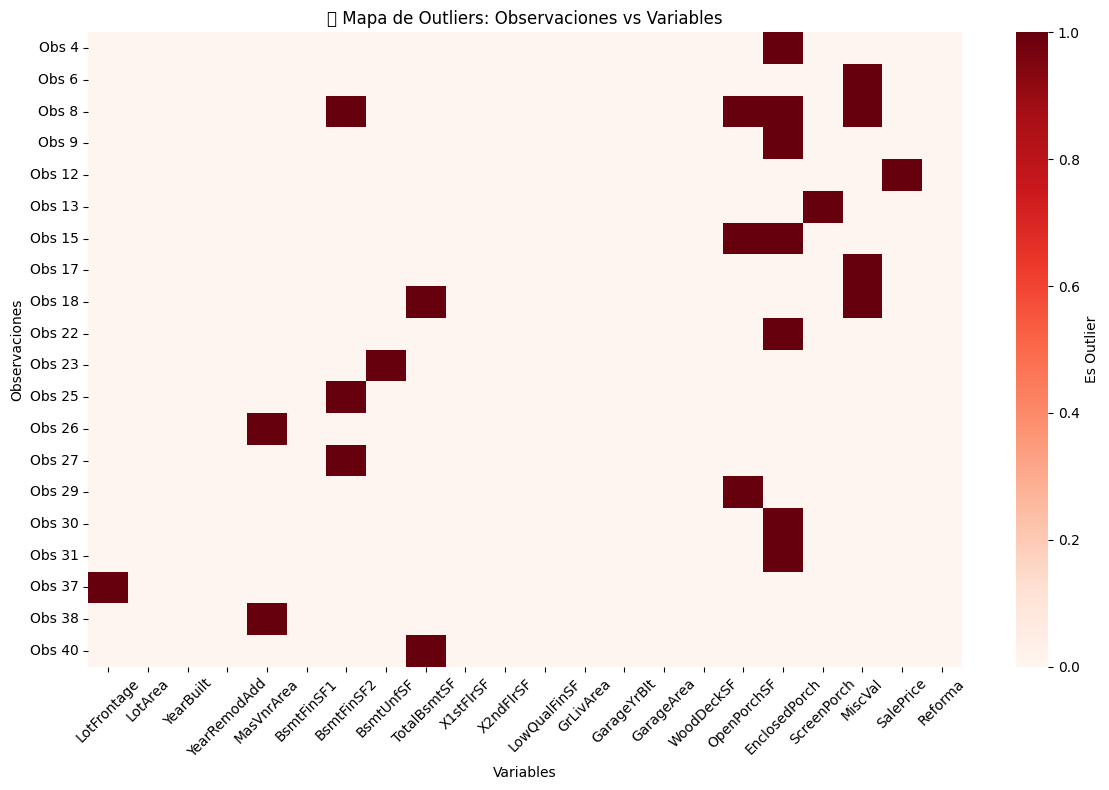

✅ Mapa de calor creado para 20 observaciones


In [18]:
# ======================================
# PASO 7: VISUALIZACIÓN ALTERNATIVA DE OUTLIERS
# ======================================

def visualizar_outliers_alternativos(df, outliers_info, max_vars=6):
    """
    Crea visualizaciones alternativas para mostrar outliers
    """
    # Filtrar variables con outliers
    vars_con_outliers = [var for var, info in outliers_info.items() if info['count'] > 0]
    vars_a_mostrar = vars_con_outliers[:max_vars]
    
    if len(vars_a_mostrar) == 0:
        print("ℹ️ No hay variables con outliers para visualizar")
        return
    
    # Configurar subplot
    n_vars = len(vars_a_mostrar)
    fig, axes = plt.subplots(2, min(3, n_vars), figsize=(15, 10))
    if n_vars == 1:
        axes = np.array([[axes], [axes]])
    elif n_vars <= 3:
        axes = axes.reshape(2, -1)
    
    for i, variable in enumerate(vars_a_mostrar):
        if i >= 3:  # Limitar a 3 variables por claridad
            break
            
        col_idx = i
        
        # Preparar datos
        serie = df[variable].dropna()
        outliers_indices = outliers_info[variable]['indices']
        outliers_mask = serie.index.isin(outliers_indices)
        
        # Gráfico 1: Scatter plot con outliers resaltados
        ax1 = axes[0, col_idx]
        ax1.scatter(range(len(serie)), serie, c=['red' if x else 'blue' for x in outliers_mask], 
                   alpha=0.6, s=20)
        ax1.set_title(f'🔴 {variable}\nOutliers en rojo')
        ax1.set_xlabel('Índice')
        ax1.set_ylabel('Valor')
        ax1.grid(True, alpha=0.3)
        
        # Gráfico 2: Histograma con outliers
        ax2 = axes[1, col_idx]
        ax2.hist(serie, bins=30, alpha=0.7, color='lightblue', edgecolor='black')
        
        # Marcar límites de outliers
        limite_inf = outliers_info[variable]['limite_inferior']
        limite_sup = outliers_info[variable]['limite_superior']
        ax2.axvline(limite_inf, color='red', linestyle='--', alpha=0.8, label='Límites outliers')
        ax2.axvline(limite_sup, color='red', linestyle='--', alpha=0.8)
        
        ax2.set_title(f'📊 Distribución de {variable}')
        ax2.set_xlabel('Valor')
        ax2.set_ylabel('Frecuencia')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
    
    # Ocultar axes no utilizados
    for i in range(len(vars_a_mostrar), 3):
        if i < axes.shape[1]:
            axes[0, i].set_visible(False)
            axes[1, i].set_visible(False)
    
    plt.tight_layout()
    plt.suptitle('📈 Visualización Alternativa de Outliers', fontsize=16, y=1.02)
    plt.show()

# Crear visualizaciones alternativas
print("🎨 VISUALIZACIÓN ALTERNATIVA DE OUTLIERS")
print("=" * 45)
visualizar_outliers_alternativos(data_solo_numericas, outliers_iqr)

# Crear un mapa de calor de outliers por observación
print("\n🗺️ Mapa de calor de outliers por observación:")

# Crear matriz de outliers (observaciones vs variables)
if len(obs_outliers) > 0:
    # Seleccionar una muestra de observaciones para visualizar
    muestra_obs = list(obs_outliers)[:20]  # Primeras 20 observaciones con outliers
    
    outliers_matrix = []
    for idx in muestra_obs:
        fila = []
        for variable in vars_numericas:
            es_outlier = idx in outliers_iqr[variable]['indices'] if variable in outliers_iqr else False
            fila.append(1 if es_outlier else 0)
        outliers_matrix.append(fila)
    
    # Crear heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(outliers_matrix, 
                xticklabels=vars_numericas, 
                yticklabels=[f'Obs {idx}' for idx in muestra_obs],
                cmap='Reds', 
                cbar_kws={'label': 'Es Outlier'},
                annot=False)
    plt.title('🗺️ Mapa de Outliers: Observaciones vs Variables')
    plt.xlabel('Variables')
    plt.ylabel('Observaciones')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    print(f"✅ Mapa de calor creado para {len(muestra_obs)} observaciones")
else:
    print("ℹ️ No hay suficientes outliers para crear el mapa de calor")

In [19]:
# ======================================
# PASO 8: TRANSFORMAR OUTLIERS EN NAs
# ======================================

def transformar_outliers_a_na(df, outliers_info, excluir_cols=None):
    """
    Transforma outliers en valores NaN
    """
    if excluir_cols is None:
        excluir_cols = []
    
    df_limpio = df.copy()
    resumen_transformacion = {}
    
    print("🔄 TRANSFORMACIÓN DE OUTLIERS A NA")
    print("=" * 40)
    
    for variable, info in outliers_info.items():
        if variable in excluir_cols:
            print(f"⏭️ Saltando {variable} (excluida)")
            continue
            
        if info['count'] > 0:
            # Transformar outliers a NaN
            outliers_indices = info['indices']
            df_limpio.loc[outliers_indices, variable] = np.nan
            
            resumen_transformacion[variable] = {
                'outliers_transformados': len(outliers_indices),
                'indices': outliers_indices
            }
            
            print(f"✅ {variable}: {len(outliers_indices)} outliers → NA")
        else:
            print(f"ℹ️ {variable}: Sin outliers")
    
    return df_limpio, resumen_transformacion

# Definir columnas a excluir (ID y variable objetivo si existen)
excluir_columnas = []
if 'Id' in data_solo_numericas.columns:
    excluir_columnas.append('Id')
if 'SalePrice' in data_solo_numericas.columns:
    excluir_columnas.append('SalePrice')

print(f"🚫 Columnas excluidas de la transformación: {excluir_columnas}")

# Transformar outliers
data_sin_outliers, resumen_transformacion = transformar_outliers_a_na(
    data_solo_numericas, outliers_iqr, excluir_columnas
)

# Mostrar resumen
total_outliers_transformados = sum([info['outliers_transformados'] 
                                   for info in resumen_transformacion.values()])

print(f"\n📊 RESUMEN DE TRANSFORMACIÓN:")
print(f"   • Total outliers transformados a NA: {total_outliers_transformados}")
print(f"   • Variables modificadas: {len(resumen_transformacion)}")

# Verificar valores faltantes después de la transformación
print(f"\n🔍 Valores faltantes después de la transformación:")
valores_na = data_sin_outliers.isnull().sum()
print(valores_na[valores_na > 0])

🚫 Columnas excluidas de la transformación: ['SalePrice']
🔄 TRANSFORMACIÓN DE OUTLIERS A NA
✅ LotFrontage: 88 outliers → NA
✅ LotArea: 69 outliers → NA
✅ YearBuilt: 7 outliers → NA
ℹ️ YearRemodAdd: Sin outliers
✅ MasVnrArea: 96 outliers → NA
✅ BsmtFinSF1: 7 outliers → NA
✅ BsmtFinSF2: 167 outliers → NA
✅ BsmtUnfSF: 29 outliers → NA
✅ TotalBsmtSF: 61 outliers → NA
✅ X1stFlrSF: 20 outliers → NA
✅ X2ndFlrSF: 2 outliers → NA
✅ LowQualFinSF: 26 outliers → NA
✅ GrLivArea: 31 outliers → NA
ℹ️ GarageYrBlt: Sin outliers
✅ GarageArea: 21 outliers → NA
✅ WoodDeckSF: 32 outliers → NA
✅ OpenPorchSF: 77 outliers → NA
✅ EnclosedPorch: 208 outliers → NA
✅ ScreenPorch: 116 outliers → NA
✅ MiscVal: 52 outliers → NA
⏭️ Saltando SalePrice (excluida)
ℹ️ Reforma: Sin outliers

📊 RESUMEN DE TRANSFORMACIÓN:
   • Total outliers transformados a NA: 1109
   • Variables modificadas: 18

🔍 Valores faltantes después de la transformación:
LotFrontage      347
LotArea           69
YearBuilt          7
MasVnrArea      

In [12]:
# ======================================
# PASO 9: REUNIR TODOS LOS DATOS Y GUARDAR
# ======================================

# Reunir variables numéricas procesadas con variables categóricas originales
print("🔗 REUNIENDO TODOS LOS DATOS")
print("=" * 30)

# Obtener variables no numéricas del dataset original
data_no_numericas = data.select_dtypes(exclude=[np.number])
print(f"📊 Variables no numéricas: {list(data_no_numericas.columns)}")

# Reunir variables categóricas codificadas que se identificaron antes
if vars_categoricas:
    data_categoricas_codificadas = data[vars_categoricas]
    print(f"🏷️ Variables categóricas codificadas: {vars_categoricas}")
else:
    data_categoricas_codificadas = pd.DataFrame(index=data.index)

# Combinar todos los datos
data_final = pd.concat([
    data_no_numericas,           # Variables no numéricas originales
    data_categoricas_codificadas, # Variables categóricas codificadas
    data_sin_outliers            # Variables numéricas sin outliers
], axis=1)

# Verificar que no hay duplicación de columnas
columnas_duplicadas = data_final.columns.duplicated()
if columnas_duplicadas.any():
    print(f"⚠️ Columnas duplicadas encontradas: {data_final.columns[columnas_duplicadas].tolist()}")
    # Eliminar duplicados manteniendo la primera ocurrencia
    data_final = data_final.loc[:, ~columnas_duplicadas]

print(f"\n📊 DATASET FINAL:")
print(f"   • Dimensiones: {data_final.shape}")
print(f"   • Columnas totales: {len(data_final.columns)}")
print(f"   • Variables numéricas procesadas: {len(data_sin_outliers.columns)}")
print(f"   • Variables categóricas: {len(data_no_numericas.columns) + len(vars_categoricas)}")

# Mostrar información de valores faltantes
valores_faltantes = data_final.isnull().sum()
total_na = valores_faltantes.sum()
print(f"   • Total valores faltantes: {total_na}")

if total_na > 0:
    print(f"\n🔍 Variables con valores faltantes:")
    for col, count in valores_faltantes[valores_faltantes > 0].items():
        porcentaje = (count / len(data_final)) * 100
        print(f"   • {col}: {count} ({porcentaje:.2f}%)")

# Guardar el dataset procesado
nombre_archivo = 'datos_sin_outliers.csv'
try:
    data_final.to_csv(nombre_archivo)
    print(f"\n💾 Dataset guardado como: {nombre_archivo}")
    print(f"📁 Ubicación: {os.path.abspath(nombre_archivo)}")
except Exception as e:
    print(f"❌ Error al guardar: {str(e)}")

# Resumen final del ejercicio
print(f"\n🎉 EJERCICIO COMPLETADO")
print("=" * 25)
print("✅ Datos cargados y explorados")
print("✅ Variables categóricas vs numéricas identificadas")
print("✅ Outliers detectados y analizados")
print("✅ Observaciones problemáticas identificadas")
print("✅ Visualizaciones alternativas creadas")
print("✅ Outliers transformados a valores faltantes")
print("✅ Dataset final reunido y guardado")
print(f"\n📊 Resultado: Dataset de {data_final.shape[0]} filas y {data_final.shape[1]} columnas")
print(f"🎯 Outliers procesados: {total_outliers_transformados} → NA")

🔗 REUNIENDO TODOS LOS DATOS
📊 Variables no numéricas: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'Crisis']
🏷️ Variables categóricas codificadas: ['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'X3SsnPorch', 'PoolArea', 'MoSold', 'YrSold']

📊 DATASET FINAL:
   • Dimensiones: (1460, 82)
   • Columnas totales: 82
   • Variables numéric